In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('height-weight.csv')

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [30]:
X = df[['Weight']]
y = df['Height']


from sklearn.model_selection import train_test_split

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)

model.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [34]:
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [17.2982057]
Intercept:  156.47058823529412


In [35]:

y_pred = model.predict(X_test)

y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  114.84069295228699
Mean Absolute Error:  9.665125886795005
R2 Score:  0.7360826717981276


In [46]:
my_weight = 67

predict_height = model.predict(scaler.transform([[my_weight]]))[0]

predict_height_in_feet = predict_height * 0.0328084

print("Predicting your height based on your weight: ",predict_height_in_feet)

Predicting your height based on your weight:  4.945466756448418


/Users/mac/Desktop/MLOps/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


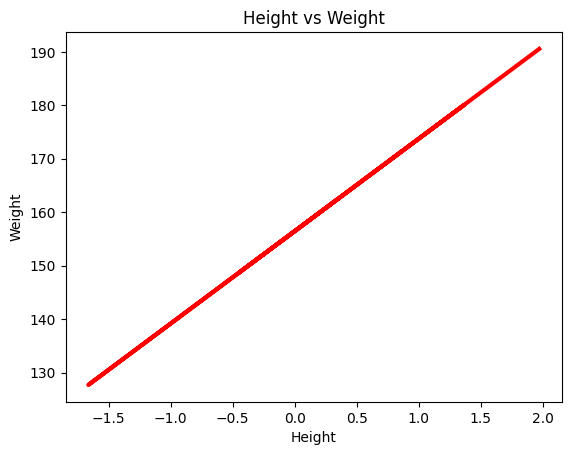

In [38]:
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()
